In [1]:
from IPython.display import display, HTML
display(HTML('<h1><img src="logo.png" style="background-color: black"></h1>'))

In [2]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
%matplotlib inline
warnings.filterwarnings('ignore')

# Annual Prediction 

In [3]:
train2 = pd.read_csv("Bihis 2020.csv")

In [4]:
train1 = pd.read_csv("Bihis 2021.csv")

In [5]:
test = pd.read_csv("Bihis 2022.csv")

In [6]:
train2_len = len(train2)
train1_len = len(train1)
test_len = len(test)

In [7]:
df = pd.concat([train2, train1, test], axis=0)
pd.set_option('display.max_rows', df.shape[0]+1)
df.reset_index(drop=True, inplace=True)
df

,Name,Size,Cost,Category,Sales,Year
0,Kamias,Medium,100,Tree,3400.0,2020
1,Kalamasi,Medium,120,Tree,4080.0,2020
2,Papaya,Small,50,Tree,1700.0,2020
3,Tundan,Small,80,Tree,3200.0,2020
4,Lakatan,Small,150,Tree,10500.0,2020
5,Rambutan,Medium,250,Tree,5000.0,2020
6,Suha,Small,130,Tree,1950.0,2020
7,Atis,Medium,130,Tree,3770.0,2020
8,Guyabano,Medium,100,Tree,2200.0,2020
9,Lemon,Large,100,Tree,1700.0,2020


In [8]:
%%capture
print(len(train2), len(train1), len(test), len(df))

In [9]:
%%capture
df.apply(lambda x: len(x.unique()))

In [10]:
%%capture
df.isnull().sum()

In [11]:
%%capture
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

In [12]:
%%capture
cat_col.remove('Name')
cat_col

In [13]:
%%capture
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print();

In [14]:
%%capture
size_mode = df.pivot_table(values = 'Size', columns = 'Category', aggfunc=(lambda x: x.mode()[0]))
size_mode

In [15]:
miss_bool = df['Size'].isnull()
df.loc[miss_bool, 'Size'] = df.loc[miss_bool, 'Category'].apply(lambda x: size_mode[x])

In [16]:
%%capture
df['Size'].isnull().sum()

In [17]:
df['Total_Year'] = 2022 - df['Year']

In [18]:
%%capture
df['Total_Year']

In [19]:
%%capture
fig0 = sns.swarmplot(df['Cost'])
plt.xlabel("Range")
plt.title("Cost")
plt.ylabel("Peak")
fig1 = sns.distplot(df['Sales'])
plt.xlabel("Range")
plt.title("Sales")
plt.ylabel("Peak")

In [20]:
%%capture
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
sns.histplot(df['Sales'])

In [21]:
%%capture
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: right;
    text-align: right;
}
</style>
"""))
sns.violinplot(df['Year'])

In [22]:
%%capture
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

In [23]:
%%capture
df = pd.get_dummies(df, columns=[ 'Size', 'Category'])
df.head();

In [24]:
%%capture
df.tail();

In [25]:
%%capture
train2 = df.iloc[:train2_len,:]
train1 = df.iloc[train2_len:,:]
test = df.iloc[train2_len:,:]

In [26]:
%%capture
test = test.drop(columns=['Sales'])
test.head();

In [27]:
%%capture
test.tail();

In [28]:
%%capture
X = train2.drop(columns=['Year', 'Name', 'Sales'])
y = train2['Sales']

# Accuracy of model

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train2(model, X, y):
    model.fit(X, y)
    
    pred = model.predict(X)
    
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("Accuracy:", mean_squared_error(y,pred))
    print("CrossValidationScore:", cv_score)

Model Report
Accuracy: 775333.1930649403
CrossValidationScore: 5289873.157212102


<Axes: title={'center': 'Feature Importances'}>

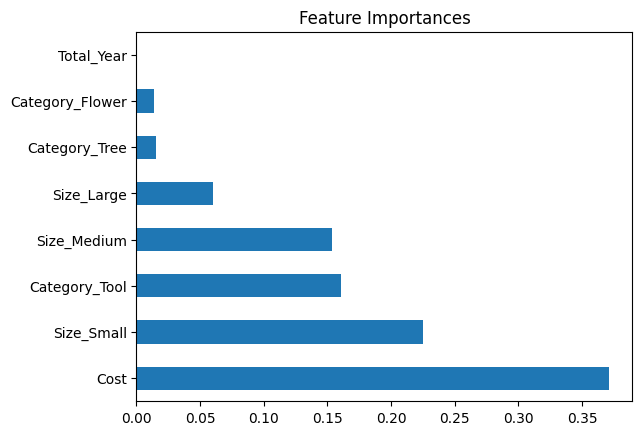

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train2(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='barh', title="Feature Importances")

In [31]:
%%capture
x_test = test.drop(columns=['Year', 'Name'])
x_test.head();

In [32]:
%%capture
model = RandomForestRegressor()
model.fit(X, y)

In [33]:
pred = model.predict(x_test)
pred

array([2693.74285714, 3857.91583333, 1974.61      , 2857.67666667,
       6979.56595238, 3866.        , 2306.42858225, 3545.09083333,
       2693.74285714, 1517.6952381 , 2306.42858225, 2693.74285714,
       2616.86261905, 2306.42858225, 3242.3       , 1517.6952381 ,
       2306.42858225, 3866.        , 2745.36666667, 5812.96666667,
       4455.5       , 4677.2       , 2189.07619048, 1910.94285714,
       2775.7       , 2332.35714286, 1752.5       , 2427.8       ,
       6973.41595238, 3242.3       , 2693.74285714, 3857.91583333,
       1974.61      , 2857.67666667, 6979.56595238, 3866.        ,
       2306.42858225, 3545.09083333, 2693.74285714, 1517.6952381 ,
       2306.42858225, 2693.74285714, 2616.86261905, 2306.42858225,
       3242.3       , 1517.6952381 , 2306.42858225, 3866.        ,
       2745.36666667, 5812.96666667, 4455.5       , 4677.2       ,
       2189.07619048, 1910.94285714, 2775.7       , 2332.35714286,
       1752.5       , 2427.8       , 6973.41595238, 3242.3    

# Annual Prediction result

In [34]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred
mission['Year'] = 2022
pd.set_option('display.max_rows', df.shape[0]+1)
mission


,Name,sales,Year
28,Kamias,2693.742857,2022
29,Kalamasi,3857.915833,2022
30,Papaya,1974.610000,2022
31,Tundan,2857.676667,2022
32,Lakatan,6979.565952,2022
33,Rambutan,3866.000000,2022
34,Suha,2306.428582,2022
35,Atis,3545.090833,2022
36,Guyabano,2693.742857,2022
37,Lemon,1517.695238,2022


In [35]:
filename = 'mymodel.sav'
f = open(filename, 'wb')
pickle.dump(model, f)
f.close()

# Quarterly Prediction

In [36]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred / 12
mission['Quarterly'] = 3
pd.set_option('display.max_rows', df.shape[0]+1)
mission

,Name,sales,Quarterly
28,Kamias,224.478571,3
29,Kalamasi,321.492986,3
30,Papaya,164.550833,3
31,Tundan,238.139722,3
32,Lakatan,581.630496,3
33,Rambutan,322.166667,3
34,Suha,192.202382,3
35,Atis,295.424236,3
36,Guyabano,224.478571,3
37,Lemon,126.474603,3


# Monthly Prediction

In [37]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred / 36
mission['monthly'] = 1
pd.set_option('display.max_rows', df.shape[0]+1)
mission

,Name,sales,monthly
28,Kamias,74.826190,1
29,Kalamasi,107.164329,1
30,Papaya,54.850278,1
31,Tundan,79.379907,1
32,Lakatan,193.876832,1
33,Rambutan,107.388889,1
34,Suha,64.067461,1
35,Atis,98.474745,1
36,Guyabano,74.826190,1
37,Lemon,42.158201,1
